# Importando Blibiotecas

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from neuralprophet import NeuralProphet
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics as me

# Importando os dados

In [36]:
df_demandas = pd.read_csv('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Demandas_treinamento/demandas')[['date','demandas']]
df_demandas.columns = ['ds','y']

# Fase de Testes

In [37]:
df_train, df_test = df_demandas.iloc[:166],df_demandas.iloc[166:]

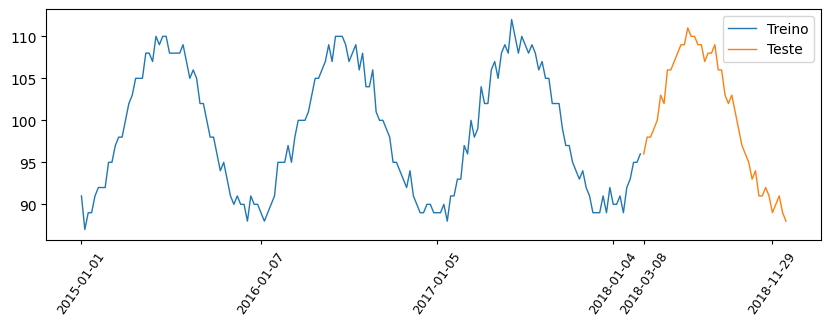

In [38]:
fig=plt.figure(figsize=(10,3))

ax=fig.add_subplot(1,1,1)
plt.plot(df_train.ds,df_train.y,label='Treino', linewidth=1)
plt.plot(df_test.ds,df_test.y,label='Teste', linewidth=1)
plt.xticks([df_demandas.iloc[i,0] for i in [0,53,105,157,166,204]])
plt.tick_params(axis='x', labelsize=9, length=3)
plt.legend()

for tick in ax.get_xticklabels():
    tick.set_rotation(55)

plt.savefig('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/img/DemandasTreinoTeste.png', bbox_inches='tight',pad_inches = 0.1,format='png')


In [39]:
round(len(df_test)/len(df_demandas),4)

0.2057

In [40]:
qtd_previsoes = 1
n_lags = 43
'''
indices_mudanca = [0,46,83,len(df_demandas)-1]
pontos_mudanca = [df_demandas.ds[i] for i in indices_mudanca]'''

'\nindices_mudanca = [0,46,83,len(df_demandas)-1]\npontos_mudanca = [df_demandas.ds[i] for i in indices_mudanca]'

In [41]:
params = { "growth": "off",
           #"trend_reg": 0.01,
           #"changepoints_range":0.3,
           "n_forecasts":qtd_previsoes,
           "n_changepoints": 0,
           #"batch_size": 50,
           "n_lags": n_lags,
           "learning_rate": 0.1,
           "epochs": 100,
           #"changepoints": pontos_mudanca,
           "yearly_seasonality":2, #ao se colocar um numero, ele defini o grau da serie de fourier, por padrao e 6
           "weekly_seasonality":False,
           "daily_seasonality":False,
           "num_hidden_layers":3,
           "d_hidden":52
        }

In [42]:
model = NeuralProphet(**params)

In [43]:
metrics = model.fit(df_train,freq='7d')
previsoes = model.predict(df_demandas)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.398% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.524% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


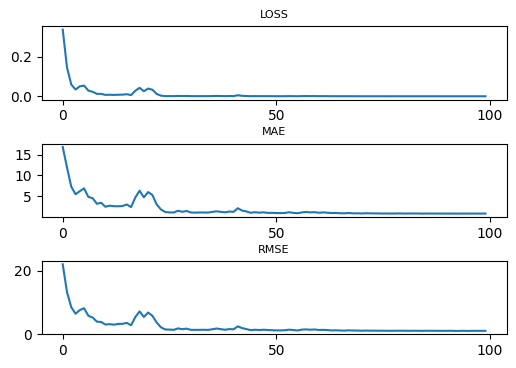

In [44]:
fig=plt.figure(figsize=(6,4))
plt.subplots_adjust(wspace=0.3, hspace=0.6)

ax=fig.add_subplot(3,1,1)
ax.set_title('LOSS',fontsize=8)
plt.plot(metrics.Loss)
plt.xticks([0,50,100])

ax=fig.add_subplot(3,1,2)
ax.set_title('MAE',fontsize=8)
plt.plot(metrics.MAE)
plt.xticks([0,50,100])

ax=fig.add_subplot(3,1,3)
ax.set_title('RMSE',fontsize=8)
plt.plot(metrics.RMSE)
plt.xticks([0,50,100])

plt.savefig('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/img/metricas_np.png', bbox_inches='tight',pad_inches = 0.1,format='png')


In [45]:
model.plot_parameters(components=['Trend','Seasonality'])

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'type': 'scatter',
              'uid': 'bc5fa97a-51d4-452e-aa5d-784b99d992df',
              'x': array([datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2018, 3, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([79.08826, 79.08826], dtype=float32),
              'yaxis': 'y'},
             {'fill': 'none',
              'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'yearly',
              'type': 'scatter',
              'uid': '1a040e70-0d7c-40e0-809d-4ab7c7d91282',
              'x': array([datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 2, 0, 0),
                          datetime.datetime(2017, 1, 3, 0, 0), ...,
                          datetime.

In [46]:
previsoes_test = previsoes['yhat1'].iloc[166:]

<AxesSubplot: >

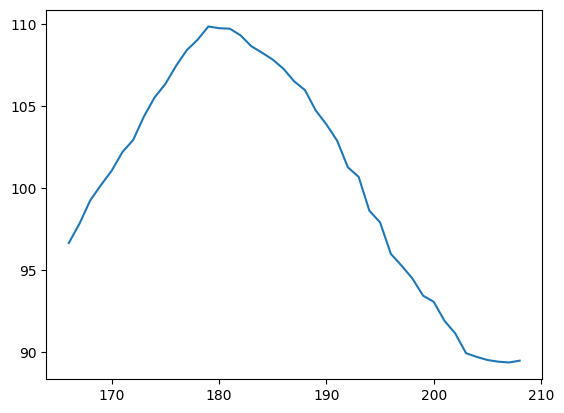

In [58]:
previsoes_test.plot()

In [47]:

with open("C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Prev_teste/test_pro.txt", "w") as arquivo:
    n = len(previsoes_test)
    for j in range(n-1):
        arquivo.write(f'{previsoes_test.values[j]},')
    arquivo.write(f'{previsoes_test.values[n-1]}')


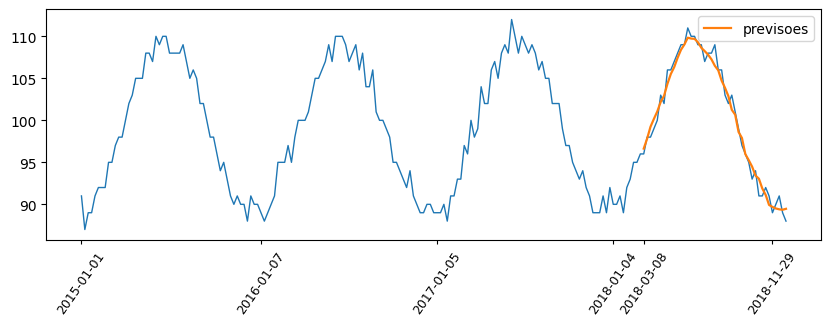

In [48]:
fig=plt.figure(figsize=(10,3))

'''
ax=fig.add_subplot(2,1,1)


plt.scatter(df_test.ds,previsoes_test,label='previsões',color='black')
plt.plot(df_test.ds,df_test.y,label='demandas reais')

indice = 0 
for i in range(len(previsoes_test)):
    if previsoes_test[i] > df_test.y.iloc[i]:
        plt.vlines(x=i, ymin=df_test.y.iloc[i], ymax=previsoes_test[i],linestyle='--',color='black')
    else:
        plt.vlines(x=i, ymin=previsoes_test[i], ymax=df_test.y.iloc[i],linestyle='--',color='black')
    indice+=1
plt.xticks([df_test.iloc[i,0] for i in [0,int((len(df_test)-1)/2),len(df_test)-1]])
plt.legend()


'''

ax=fig.add_subplot(1,1,1)
plt.plot(df_demandas.ds,df_demandas.y, linewidth=1)
plt.plot(df_demandas.ds[166:],previsoes_test,label='previsoes', linewidth=1.6)

plt.xticks([df_demandas.iloc[i,0] for i in [0,53,105,157,166,204]])
plt.tick_params(axis='x', labelsize=9, length=3)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.legend()


In [49]:
residuos = np.array(df_test.y)-previsoes_test

$e_{i} = y_{i}-\hat{y}_{i}\sim N\left(0,30\right)$

In [50]:
normal = np.random.normal(0, 1,2000000)

$\mathbf{IMPORTANTE}$

Em modelos de séries temporais, não existem nenhuma suposição em relação aos resíduos, contudo, sabemos como o nosso resíduo e nossos dados se comportam, suas distribuições e etc, portanto usaremos isso a nosso favor para se construir um bom modelo. Por isso a análise de resíduo a seguir

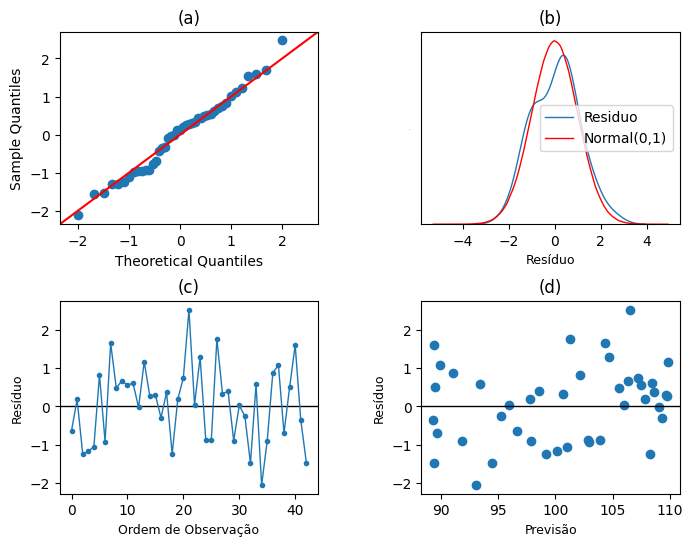

In [56]:
fig=plt.figure(figsize=(8,6))
titulo = ['(a)','(b)','(c)','(d)']
plt.subplots_adjust(wspace=0.4, hspace=0.4)

ax=fig.add_subplot(2,2,3)
ax.set_title(titulo[2])
plt. axhline(y=0,xmin=0,xmax=len(df_test.y),color='black', linewidth=1)
plt.plot(range(len(residuos)),residuos,marker='.', linewidth=1)
plt.ylabel('Resíduo',fontsize=9)
plt.xlabel('Ordem de Observação',fontsize=9)

ax=fig.add_subplot(2,2,2)
ax.set_title(titulo[1])
sns.kdeplot(residuos,label="Residuo", linewidth=1)
sns.kdeplot(normal,label='Normal(0,1)', linewidth=1,color='red')
plt.legend()
plt.yticks([])
plt.ylabel([], fontsize=0)
plt.xlabel('Resíduo',fontsize=9)

ax=fig.add_subplot(2,2,1)
ax.set_title(titulo[0])
sm.qqplot(residuos,fit=True,line='45',ax=ax)

ax=fig.add_subplot(2,2,4)
ax.set_title(titulo[3])
plt.scatter(previsoes_test,residuos)
plt.axhline(y=0,xmin=0,xmax=len(df_test.y),color='black', linewidth=1)
plt.ylabel('Resíduo',fontsize=9)
plt.xlabel('Previsão',fontsize=9)

plt.savefig('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/img/Np_Residuos.png', bbox_inches='tight',pad_inches = 0.1,format='png')
plt.show()

In [52]:
import statsmodels.api as sm

print('RMSE_Teste =',round(sm.tools.eval_measures.rmse(previsoes_test, df_test.y, axis=0),4))
print('MAE_Teste =',round(sm.tools.eval_measures.meanabs(previsoes_test, df_test.y, axis=0),4))
print(f'MAPE_Teste = {round(100*me.mean_absolute_percentage_error(df_test.y, previsoes_test),4)}%')

RMSE_Teste = 0.9939
MAE_Teste = 0.821
MAPE_Teste = 0.8263%


MAE = $\frac{1}{n}\sum_{i=1}^{n}\mid y_{i}-\hat{y}\mid$ 

RMSE = $\sqrt{\frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-\hat{y}\right)^{2}}$

MAPE = $\frac{100}{n}\sum_{i=1}^{n}\mid \frac{y_{i}-\hat{y}}{y_{i}}\mid$ 


## Estacionariedade dos Resíduos

WARNING - (py.warnings._showwarnmsg) - C:\Users\marcio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.




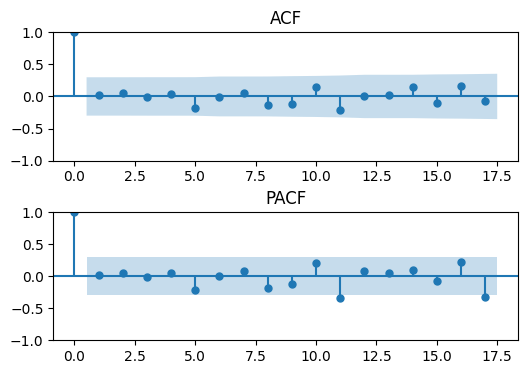

In [53]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig=plt.figure(figsize=(6,4))
plt.subplots_adjust(wspace=0, hspace=0.4)


ax=fig.add_subplot(2,1,1)
plot_acf(residuos,title='ACF',alpha=.05,ax=ax)

ax=fig.add_subplot(2,1,2)
plot_pacf(residuos,title='PACF',ax=ax)

plt.savefig('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/img/Residuo_ACF_PACF_np.png', bbox_inches='tight',pad_inches = 0.1,format='png')

plt.show()

In [54]:
params['n_lags'] = 17

# Fase de previsao

A própria da documentação, avisa de antes de fazer qualquer previsão real, reajuste o modelo para receber todos os dados

In [55]:
'''
for i in range(60):#prevendo i-esimo conjunto de demandas

    model = NeuralProphet(**params)
    metrics = model.fit(df_demandas,freq='7d')

    previsao = df_demandas.copy()
    for idx in range(17):#prevendo o conjunto de 17 demandas
        future = model.make_future_dataframe(df=previsao)
        temp = model.predict(future)
        temp['y'] = temp[['y','yhat1']].fillna(0).sum(axis=1)
        temp = temp[['ds','y']]
        previsao = previsao.append(temp.iloc[-1])
    previsao = previsao.iloc[-17:].reset_index(drop=True).y

    #salvando as previsao
    with open(f"C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Previsoes/Prev_pro/Previsao_pro{i}.txt", "w") as arquivo:

        n = len(previsao)
        for j in range(n-1):
            arquivo.write(f'{previsao[j]}, ')
        arquivo.write(f'{previsao[n-1]}')
'''

'\nfor i in range(60):#prevendo i-esimo conjunto de demandas\n\n    model = NeuralProphet(**params)\n    metrics = model.fit(df_demandas,freq=\'7d\')\n\n    previsao = df_demandas.copy()\n    for idx in range(17):#prevendo o conjunto de 17 demandas\n        future = model.make_future_dataframe(df=previsao)\n        temp = model.predict(future)\n        temp[\'y\'] = temp[[\'y\',\'yhat1\']].fillna(0).sum(axis=1)\n        temp = temp[[\'ds\',\'y\']]\n        previsao = previsao.append(temp.iloc[-1])\n    previsao = previsao.iloc[-17:].reset_index(drop=True).y\n\n    #salvando as previsao\n    with open(f"C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Previsoes/Prev_pro/Previsao_pro{i}.txt", "w") as arquivo:\n\n        n = len(previsao)\n        for j in range(n-1):\n            arquivo.write(f\'{previsao[j]}, \')\n        arquivo.write(f\'{previsao[n-1]}\')\n'